## 1. Google Play Store apps and reviews
<p>Las aplicaciones m√≥viles est√°n en todas partes. Son f√°ciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se est√°n desarrollando cada vez m√°s aplicaciones. En este ejercicio, haremos un an√°lisis completo del mercado de aplicaciones de Android comparando m√°s de diez mil aplicaciones en Google Play en diferentes categor√≠as. Buscaremos informaci√≥n valiosa en los datos para dise√±ar estrategias que impulsen el crecimiento y la retenci√≥n.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 caracter√≠sticas que describen una aplicaci√≥n determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 rese√±as para cada aplicaci√≥n, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada rese√±a se ha procesado previamente y se le atribuyen tres caracter√≠sticas nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [5]:
# Importa las librer√≠as de pandas y matplotlin
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("/Users/YChav/Desktop")

# Importa el datase apps.csv
apps = pd.read_csv("apps.csv")

# Borra todos los duplicados del dataset
apps = apps.drop_duplicates()

# Imprime el total de apps que se van a analizar que quedan (dimensi√≥n)
print('Total number of apps in the dataset = ', apps.shape[0])

# Imprime la est√°distica descriptiva de resumen
print(apps.describe())

# Vamos a echar un vistazo al DataFrame final
print(apps.head())

Total number of apps in the dataset =  9659
            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536625  1.831320e+06    21.827509
min       1.000000  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000
50%       4.300000  9.670000e+02    12.000000
75%       4.500000  2.940100e+04    28.000000
max       5.000000  7.815831e+07   100.000000
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \

## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con m√°s frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La funci√≥n <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperar√≠amos. Esto se debe a que la columna contiene algunos caracteres m√°s que solo [0,9] d√≠gitos. Idealmente, queremos que estas columnas fueran puramente num√©ricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Espec√≠ficamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aqu√≠ un link donde podr√°s ver un poco m√°s a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">funci√≥n lambda</a>

In [7]:
# Lista de caracteres a eliminar
chars_to_remove = [",", "+", "$"]
# Lista de las columnas a limpiar
cols_to_clean = ["Installs", "Price"]

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una funci√≥n lambda el caracter especial por un texto vac√≠o ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype(float)

## 3. Exploring App's categories
<p>Con m√°s de mil millones de usuarios activos en 190 pa√≠ses de todo el mundo, Google Play sigue siendo una importante plataforma de distribuci√≥n para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas m√°s r√°pida y f√°cilmente visibles en Google Play. Para mejorar la experiencia de b√∫squeda general, Google ha introducido el concepto de agrupar aplicaciones en categor√≠as.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¬øQu√© categor√≠a tiene la mayor participaci√≥n de aplicaciones (activas) en el mercado?</li>
<li>¬øAlguna categor√≠a espec√≠fica domina el mercado?</li>
<li>¬øQu√© categor√≠as tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aqu√≠ <code>33</code> categor√≠as unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> tambi√©n est√°n en el top.</p>

Number of categories =  33


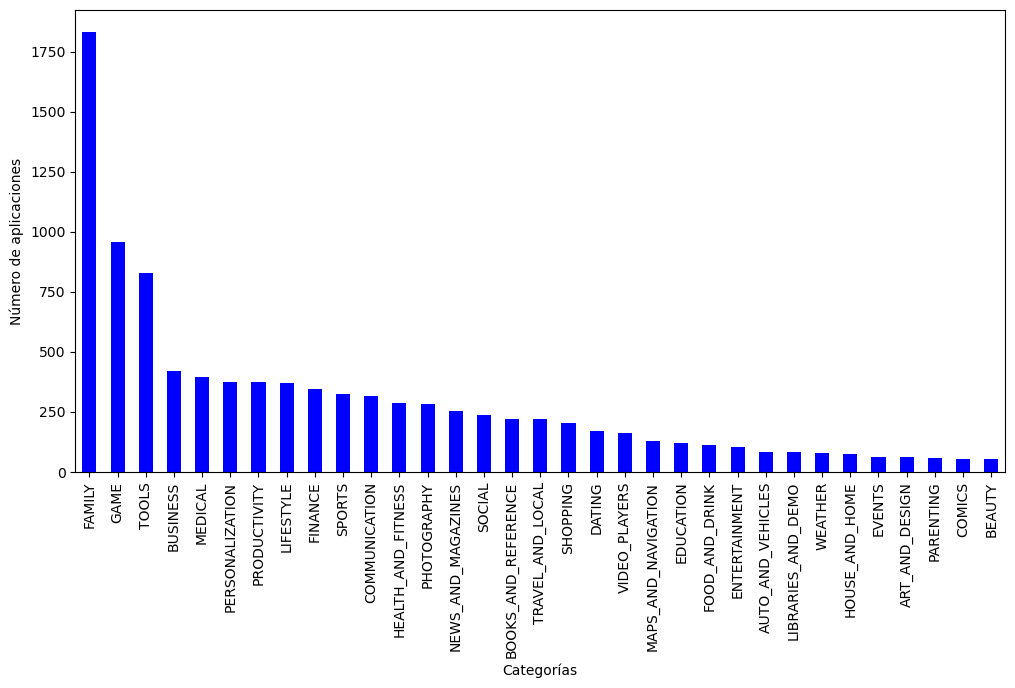

In [9]:
# Imprime el total de categor√≠as √∫nicas
num_categories = apps["Category"].nunique()
print('Number of categories = ', num_categories)

# Cuenta el n√∫mero de aplicaciones en cada Categor√≠a y ordena de manera descendente 
num_apps_in_category = apps["Category"].value_counts()

# Muestra el resultado en una gr√°fica de barras
plt.figure(figsize = (12, 6))
num_apps_in_category.plot(kind = "bar", color = "blue")
plt.xlabel("Categor√≠as")
plt.ylabel("N√∫mero de aplicaciones")
plt.show()

## 4. Ratings Distribution
<p>Despu√©s de analizar la participaci√≥n de mercado para cada categor√≠a de las aplicaciones, veamos c√≥mo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicaci√≥n.</p>

Average app rating =  4.173243045387994
Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          

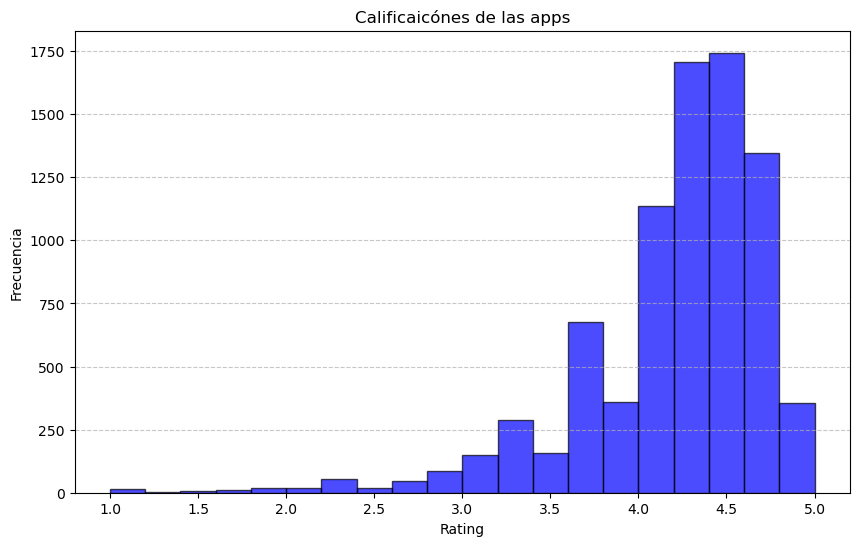

In [16]:
# Calcular el promedio de calificaci√≥n de las apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Calcula el promedio de calificaci√≥n por categor√≠a
avg_rating_category = apps.groupby("Category")["Rating"].mean().sort_values(ascending = False)
print(avg_rating_category)

# Visualiza en un histograma el comportamiento del Rating
plt.figure(figsize = (10, 6))
plt.hist(apps["Rating"].dropna(), bins = 20, color = "blue", edgecolor = "black", alpha = 0.7)
plt.title("Calificaic√≥nes de las apps")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tama√±o y el precio de la aplicaci√≥n. En cuanto al tama√±o, si la aplicaci√≥n m√≥vil es demasiado grande, puede ser dif√≠cil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicaci√≥n m√≥vil. Adem√°s, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o econ√≥micas. Estos problemas se agravan si el mercado objetivo es en pa√≠ses en v√≠as de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¬øEl tama√±o de una aplicaci√≥n afecta su calificaci√≥n?</li>
<li>¬øLos usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¬øEl precio de una aplicaci√≥n afecta su calificaci√≥n? </li>
<li>¬øLos usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

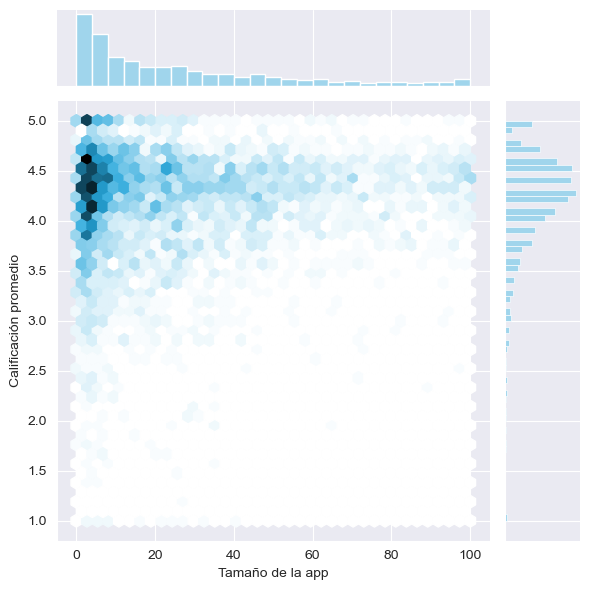

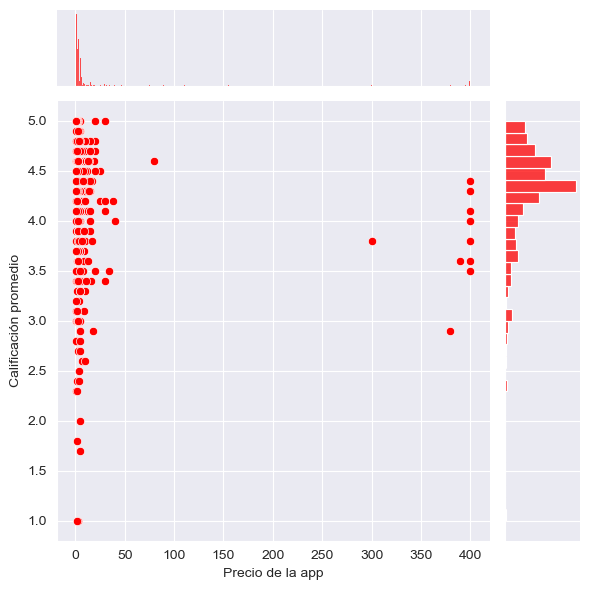

In [27]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps[apps["Rating"].notnull() & apps["Size"].notnull()]

# Filtra las categor√≠as con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Gr√°fica size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = "hex", color = "skyblue")
plt1.set_axis_labels("Tama√±o de la app", "Calificaci√≥n promedio")
# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps[apps["Type"] == "Paid"]

# Grafica price vs. rating de las paplicaciones de paga
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"], kind = "scatter", color = "red")
plt2.set_axis_labels("Precio de la app", "Calificaci√≥n promedio")
plt.show()

## 6. Relation between Category & Price
<p>As√≠ que ahora viene la parte dif√≠cil. ¬øC√≥mo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¬øQu√© estrategias de monetizaci√≥n pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las caracter√≠sticas, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposici√≥n de su cliente a pagar por la aplicaci√≥n. Un precio elevado puede hacer que los clientes no se vean atra√≠dos por descargarlaque ocurra la descarga o pueden eliminar una aplicaci√≥n que han descargado despu√©s de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categor√≠as exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicaci√≥n de calculadora, probablemente deber√≠an mantenerse gratuitas. Sin embargo, tendr√≠a sentido cobrar por una aplicaci√≥n m√©dica altamente especializada que diagnostica a pacientes diab√©ticos, as√≠ que vamos a descubrir y encontrar la respuesta</p>

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         üíé I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢  399.99

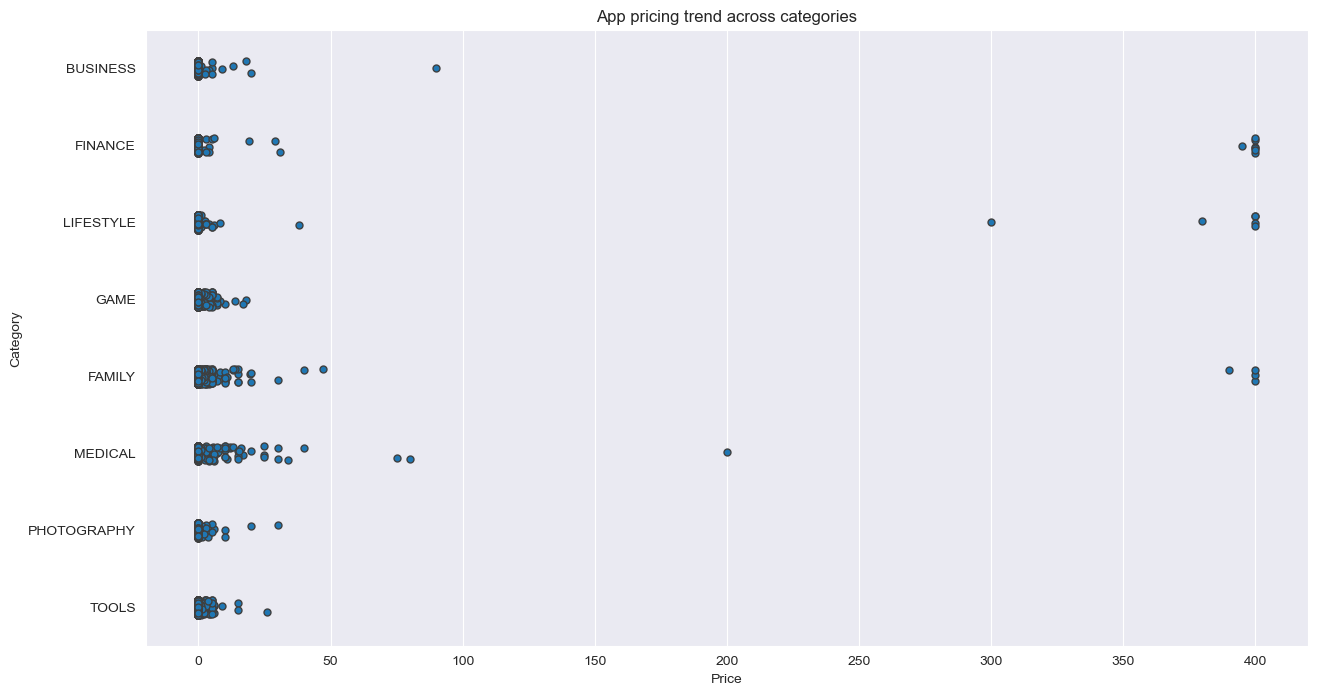

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categor√≠as populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categor√≠a
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
ax.set_xlabel("Price")
ax.set_ylabel("Category")
# Selecciona las apps con un precio mayor a 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripci√≥n. Centr√©monos solo en aplicaciones gratuitas y de pago. 

Algunas caracter√≠sticas de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicaci√≥n sirve como una extensi√≥n de esos productos.</li>
<li>Puede servir como una herramienta para la retenci√≥n de clientes, la comunicaci√≥n y el servicio al cliente.</li>
</ul>
<p>Algunas caracter√≠sticas de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¬øAdem√°s de esto que otras caracter√≠sticas diferenc√≠as a las aplicaciones de pago las aplicaciones gratuitas?</p>

gratuitas:  4.166372497365647
pago:  4.259602649006623
Tama√±o en Megabytes gratuitas:  20.51755518265135
Tama√±o en Megabytes  pago:  19.012992700729928


<Figure size 1500x800 with 0 Axes>

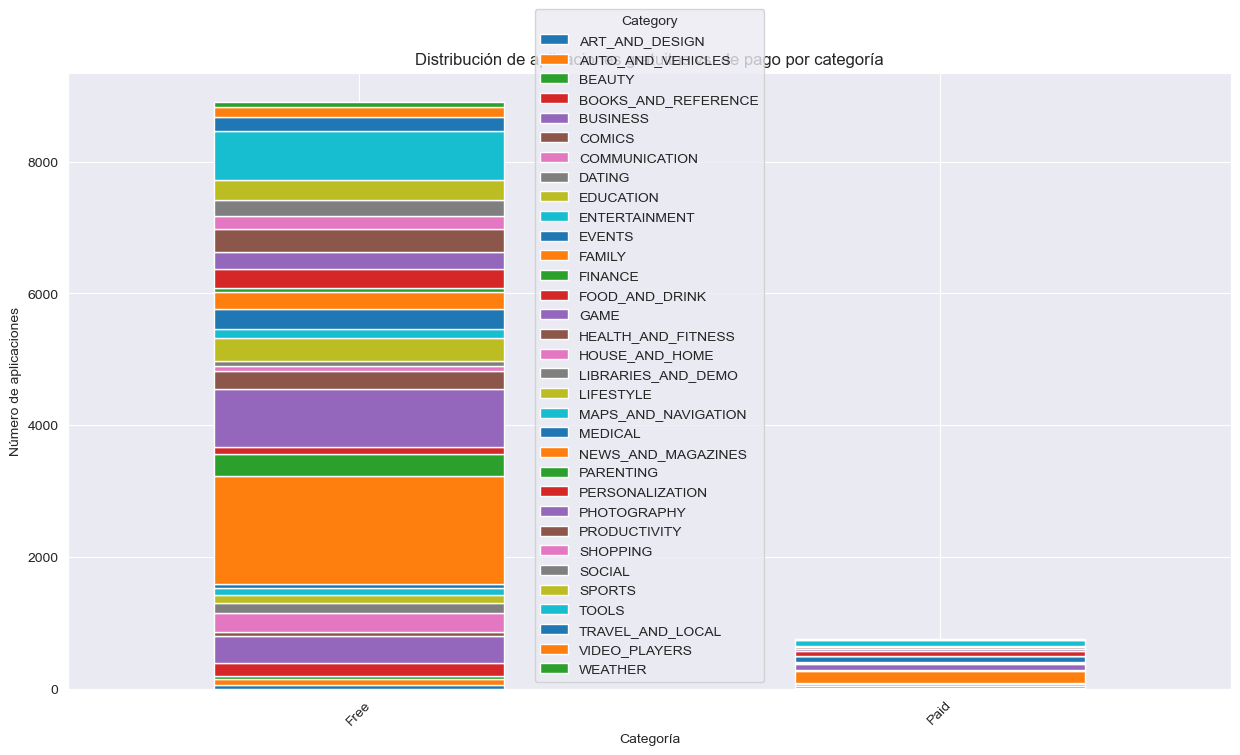

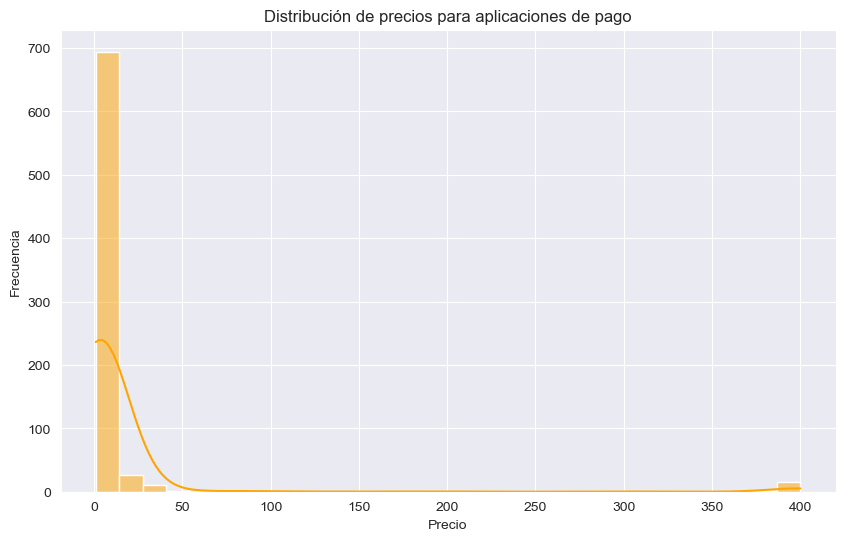

Volumen total de instalaciones: Type
Free    7.506557e+10
Paid    5.736488e+07
Name: Installs, dtype: float64


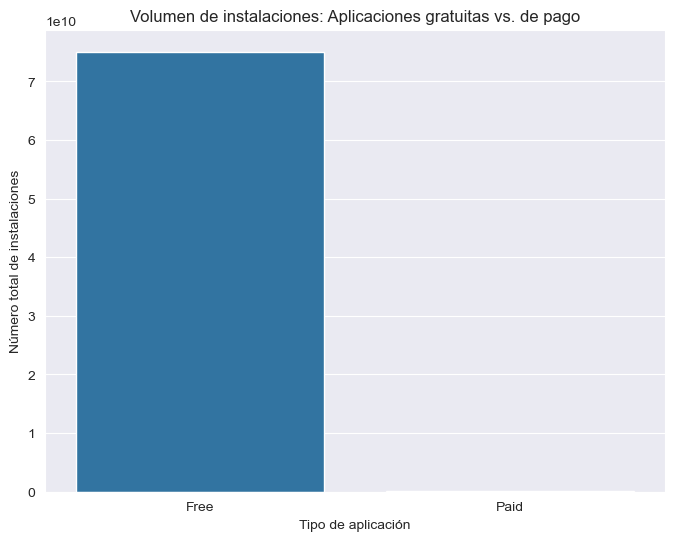

In [35]:
import seaborn as sns

# Filtrar las aplicaciones gratuitas y de pago
free_apps = apps[apps["Type"] == "Free"]
paid_apps = apps[apps["Type"] == "Paid"]

# 1. Comparar calificaciones promedio
avg_rating_free = free_apps["Rating"].mean()
avg_rating_paid = paid_apps["Rating"].mean()

print( "gratuitas: ", avg_rating_free)
print("pago: ", avg_rating_paid)

# 2. Comparar tama√±os promedio
avg_size_free = free_apps["Size"].mean()
avg_size_paid = paid_apps["Size"].mean()

print("Tama√±o en Megabytes gratuitas: ", avg_size_free)
print("Tama√±o en Megabytes  pago: ", avg_size_paid)

# 3. Comparar la distribuci√≥n de categor√≠as
category_distribution = apps.groupby(["Type", "Category"]).size().unstack(fill_value=0)

# Gr√°fica de categor√≠as
plt.figure(figsize=(15, 8))
category_distribution.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.title("Distribuci√≥n de aplicaciones gratuitas vs. de pago por categor√≠a")
plt.xlabel("Categor√≠a")
plt.ylabel("N√∫mero de aplicaciones")
plt.xticks(rotation=45)
plt.show()

# 4. Comparar precios (solo para aplicaciones de pago)
plt.figure(figsize=(10, 6))
sns.histplot(paid_apps["Price"], bins=30, kde=True, color="orange")
plt.title("Distribuci√≥n de precios para aplicaciones de pago")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# 5. Comparar volumen de instalaciones
install_summary = apps.groupby("Type")["Installs"].sum()

print("Volumen total de instalaciones:", install_summary)

# Gr√°fica de instalaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=install_summary.index, y=install_summary.values)
plt.title("Volumen de instalaciones: Aplicaciones gratuitas vs. de pago")
plt.xlabel("Tipo de aplicaci√≥n")
plt.ylabel("N√∫mero total de instalaciones")
plt.show()

## 8. Sentiment analysis
<p>La miner√≠a de datos de rese√±as de usuarios para determinar c√≥mo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una t√©cnica llamada an√°lisis de sentimientos. Las rese√±as de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de √°nimo es positivo, negativo o neutral con respecto a esa aplicaci√≥n. Por ejemplo, las palabras positivas en la revisi√≥n de una aplicaci√≥n pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¬øQu√© podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

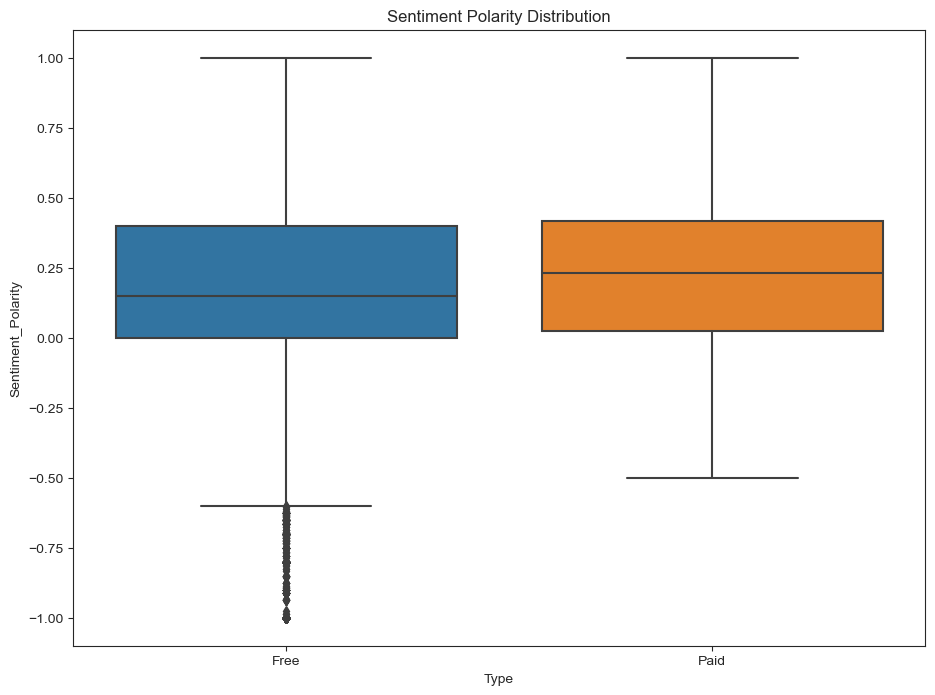

In [39]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")

# Une los dos DataFrames (join)
merged_df = pd.merge(apps, reviews_df, on = "App")

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = merged_df["Type"], y = merged_df["Sentiment_Polarity"], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

## 9. Conclusion
<p>En este cuaderno, analizamos m√°s de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar informaci√≥n valiosa por si alguna vez deseamos crear una aplicaci√≥n nosotros mismos. Espero que hayas disfrutado el curso!!! :)
    
Atte. <a href="https://www.linkedin.com/in/ivan-alducin-a87a71108/">Ivan Alducin</a></p>